<a href="https://colab.research.google.com/github/gnishitha2004-source/AI-ML-Internship-Task5/blob/main/Task5_DecisionTrees_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

heart.csv not found — loading sklearn's breast cancer dataset as fallback.
Dataset shape: (569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0



Columns and dtypes:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64

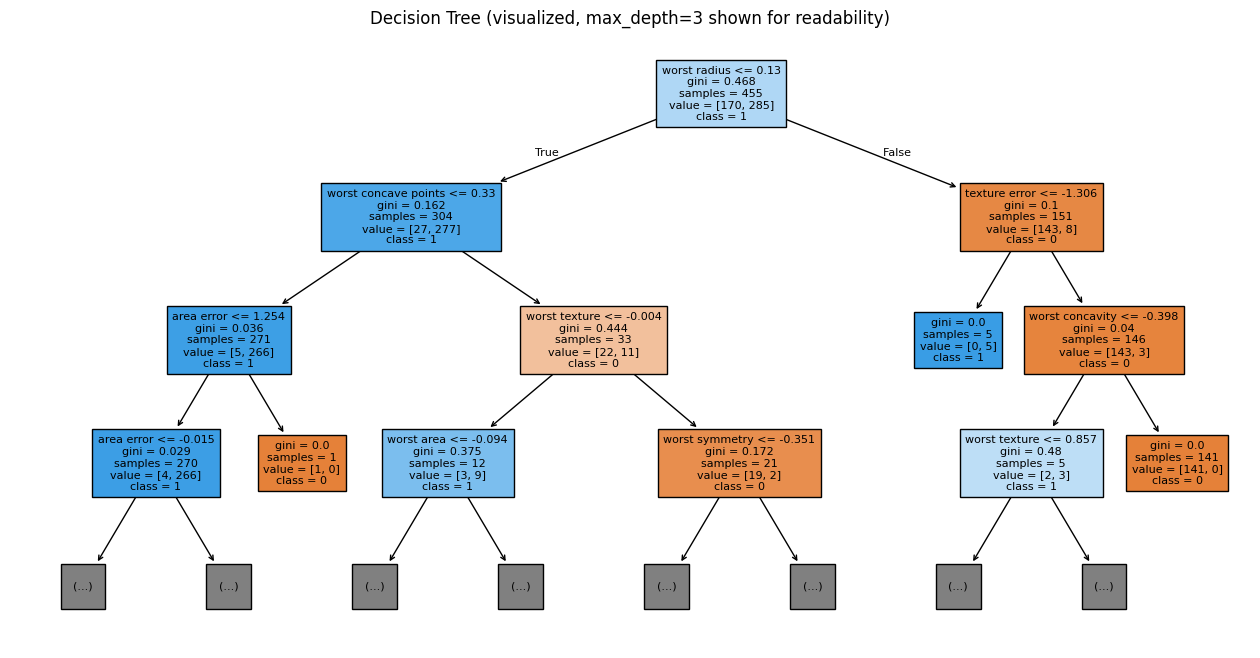

Decision Tree training accuracy: 1.0000
Decision Tree testing accuracy:  0.9123
If training >> testing, model is likely overfitting.

Best params (Decision Tree GridSearch): {'max_depth': 4, 'min_samples_split': 2}
Best CV score: 0.9384615384615385
Pruned Decision Tree test accuracy: 0.9386
Classification report (Pruned Decision Tree):
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.96      0.94      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



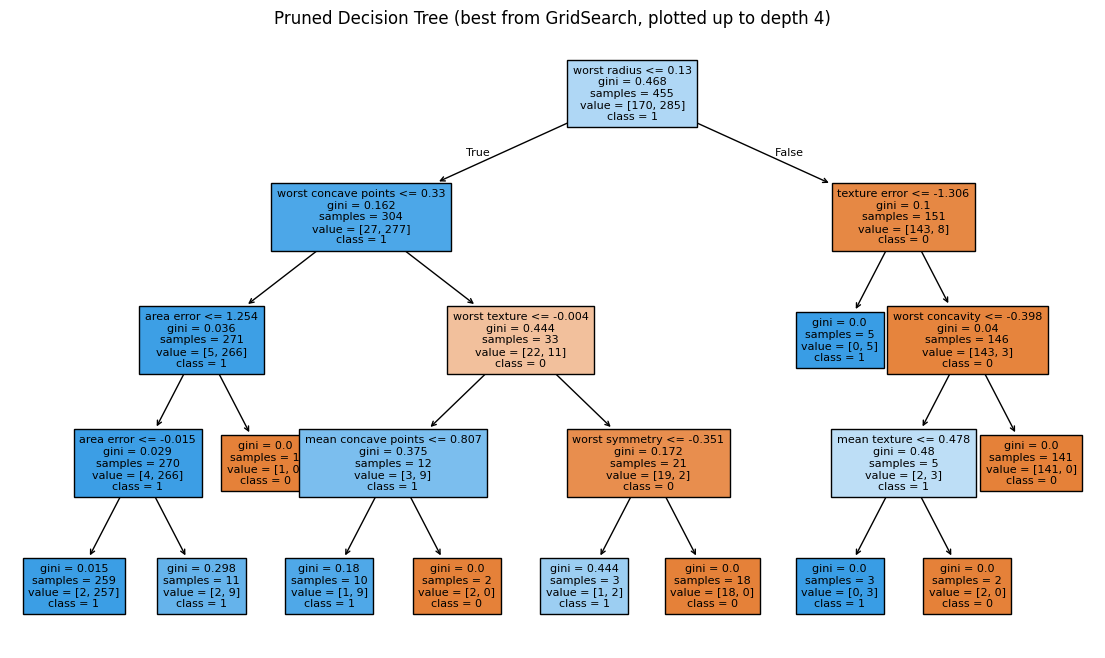

Random Forest test accuracy: 0.9561
Classification report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

Random Forest training accuracy: 1.0000, testing accuracy: 0.9561

Top 15 features by importance (Random Forest):


,feature,importance
0,worst perimeter,0.133100
1,worst area,0.128052
2,worst concave points,0.108107
3,mean concave points,0.094414
4,worst radius,0.090639
5,mean radius,0.058662
6,mean perimeter,0.055242
7,mean area,0.049938
8,mean concavity,0.046207
9,worst concavity,0.035357


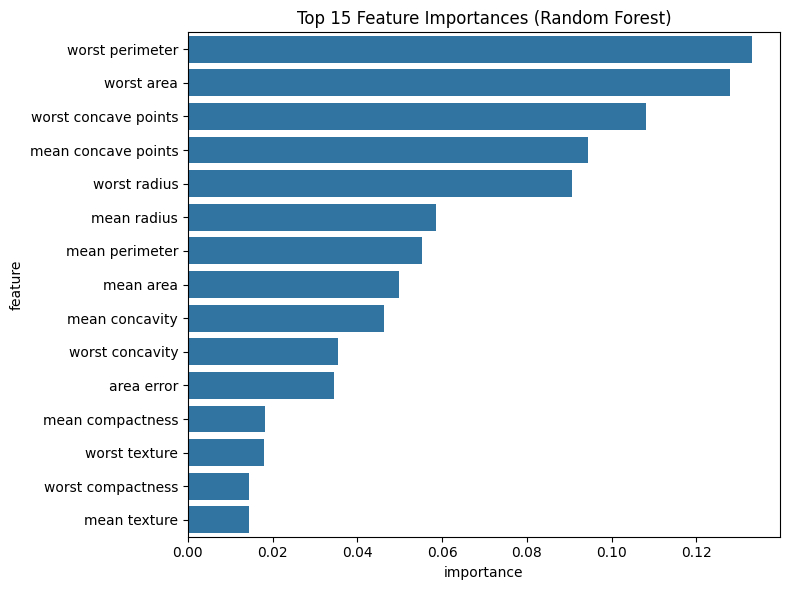


5-fold CV scores (Decision Tree, pruned): [0.95614035 0.86842105 0.92105263 0.92982456 0.9380531 ]
Mean CV accuracy (DT): 0.9227 ± 0.0295
5-fold CV scores (Random Forest): [0.96491228 0.93859649 0.95614035 0.94736842 0.96460177]
Mean CV accuracy (RF): 0.9543 ± 0.0102


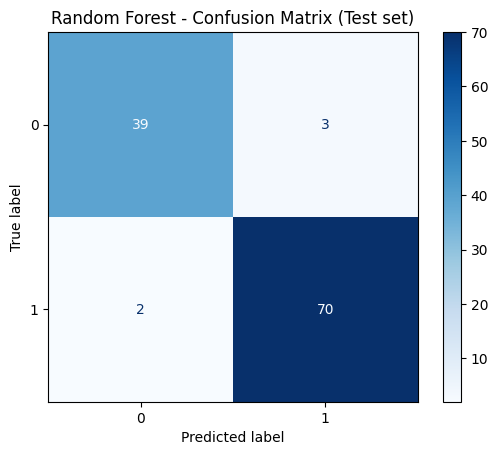


Saved artifacts to folder: artifacts/ (models, feature_importances.csv, report.txt)

--- SUMMARY ---
Decision Tree (pruned) test accuracy: 0.9386
Random Forest test accuracy: 0.9561
Artifacts saved under ./artifacts. Add code, this notebook, artifacts, and screenshots to your GitHub repository.


In [9]:
# Decision Tree & Random Forest - Full Colab-ready script
# Run in Google Colab. If you want to use Kaggle datasets, follow the Kaggle setup steps (commented below).

# 0) (Optional) If running in Colab and you want graphviz visuals:
# !apt-get -qq install -y graphviz
# !pip install -q graphviz
# After running above you may need to restart runtime for graphviz package to load cleanly.

# 1) Imports
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn import datasets
import joblib
import seaborn as sns

# 2) Load dataset
# Option A: Upload a CSV file (heart.csv or any classification CSV)
# In Colab: use the left sidebar Files -> Upload, or run:
# from google.colab import files
# uploaded = files.upload()        # then set filename below

csv_filename = "heart.csv"  # change if your CSV has a different name

if os.path.exists(csv_filename):
    df = pd.read_csv(csv_filename)
    print(f"Loaded local CSV: {csv_filename}")
else:
    # Option B: fallback to sklearn's breast cancer dataset if no CSV is provided.
    print(f"{csv_filename} not found — loading sklearn's breast cancer dataset as fallback.")
    sk = datasets.load_breast_cancer(as_frame=True)
    df = sk.frame
    # For convenience, set target to column name 'target'
    df.rename(columns={sk.target.name: "target"}, inplace=True)

print("Dataset shape:", df.shape)
display(df.head())

# 3) Quick EDA
print("\nColumns and dtypes:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isnull().sum())

print("\nTarget distribution:")
if 'target' in df.columns:
    print(df['target'].value_counts(normalize=True))
else:
    print("No 'target' column found. If using a custom CSV, please set the target column below.")

# If your CSV uses a different target name, set:
TARGET_COLUMN = 'target'   # change to your column name if necessary

if TARGET_COLUMN not in df.columns:
    # try common names:
    for candidate in ['Target', 'label', 'Label', 'y', 'class']:
        if candidate in df.columns:
            TARGET_COLUMN = candidate
            print("Using found target column:", TARGET_COLUMN)
            break
    else:
        raise ValueError("Could not find target column. Please set TARGET_COLUMN variable to the correct column name.")

# 4) Prepare X, y
X = df.drop(columns=[TARGET_COLUMN])
y = df[TARGET_COLUMN]

# If there are non-numeric columns, do a quick encode / drop
non_numeric = X.select_dtypes(include=['object', 'category']).columns.tolist()
if non_numeric:
    print("Non-numeric columns detected:", non_numeric)
    # For simplicity, apply one-hot encoding
    X = pd.get_dummies(X, columns=non_numeric, drop_first=True)
    print("One-hot encoded non-numeric columns. New shape:", X.shape)

# 5) Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

# 6) Build a pipeline with imputer + scaler (scaling helps some models)
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

X_train_proc = pipeline.fit_transform(X_train)
X_test_proc = pipeline.transform(X_test)

# 7) Baseline Decision Tree (unrestricted depth)
dt_unrestricted = DecisionTreeClassifier(random_state=42)
dt_unrestricted.fit(X_train_proc, y_train)

y_pred_dt_un = dt_unrestricted.predict(X_test_proc)
acc_dt_un = accuracy_score(y_test, y_pred_dt_un)
print(f"\nDecision Tree (unrestricted) test accuracy: {acc_dt_un:.4f}")
print("Classification report (Decision Tree unrestricted):")
print(classification_report(y_test, y_pred_dt_un))

# 8) Visualize the tree (small trees only; deep trees are messy)
# We'll print textual tree (first 3 levels) and use sklearn plot_tree for a limited depth plot.

# Textual excerpt
print("\nDecision Tree textual (first 4 levels):")
print(export_text(dt_unrestricted, feature_names=list(X.columns), max_depth=4))

# Plot tree clipping to max_depth for readability
plt.figure(figsize=(16,8))
plot_tree(dt_unrestricted, feature_names=list(X.columns), class_names=[str(c) for c in np.unique(y).tolist()],
          filled=True, max_depth=3, fontsize=8)
plt.title("Decision Tree (visualized, max_depth=3 shown for readability)")
plt.show()

# 9) Show overfitting by comparing train vs test accuracy
train_acc_dt_un = dt_unrestricted.score(X_train_proc, y_train)
test_acc_dt_un = dt_unrestricted.score(X_test_proc, y_test)
print(f"Decision Tree training accuracy: {train_acc_dt_un:.4f}")
print(f"Decision Tree testing accuracy:  {test_acc_dt_un:.4f}")
print("If training >> testing, model is likely overfitting.")

# 10) Control overfitting: grid-search for max_depth (simple)
param_grid = {'max_depth': [2, 3, 4, 5, 6, 8, None], 'min_samples_split': [2,5,10]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=42),
                    param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_proc, y_train)
print("\nBest params (Decision Tree GridSearch):", grid.best_params_)
print("Best CV score:", grid.best_score_)

best_dt = grid.best_estimator_
y_pred_best_dt = best_dt.predict(X_test_proc)
acc_best_dt = accuracy_score(y_test, y_pred_best_dt)
print(f"Pruned Decision Tree test accuracy: {acc_best_dt:.4f}")
print("Classification report (Pruned Decision Tree):")
print(classification_report(y_test, y_pred_best_dt))

# Plot pruned tree
plt.figure(figsize=(14,8))
plot_tree(best_dt, feature_names=list(X.columns), class_names=[str(c) for c in np.unique(y).tolist()],
          filled=True, max_depth=4, fontsize=8)
plt.title("Pruned Decision Tree (best from GridSearch, plotted up to depth 4)")
plt.show()

# 11) Random Forest training & comparison
rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train_proc, y_train)

y_pred_rf = rf.predict(X_test_proc)
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest test accuracy: {acc_rf:.4f}")
print("Classification report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Compare train accuracy
train_acc_rf = rf.score(X_train_proc, y_train)
print(f"Random Forest training accuracy: {train_acc_rf:.4f}, testing accuracy: {acc_rf:.4f}")

# 12) Feature importances (Random Forest)
importances = rf.feature_importances_
feat_imp = pd.DataFrame({'feature': X.columns, 'importance': importances})
feat_imp_sorted = feat_imp.sort_values(by='importance', ascending=False).reset_index(drop=True)
print("\nTop 15 features by importance (Random Forest):")
display(feat_imp_sorted.head(15))

plt.figure(figsize=(8,6))
sns.barplot(data=feat_imp_sorted.head(15), x='importance', y='feature')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.tight_layout()
plt.show()

# 13) Cross-validation: k-fold for Decision Tree and Random Forest
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
dt_cv_scores = cross_val_score(best_dt, pipeline.transform(X), y, cv=cv, scoring='accuracy', n_jobs=-1)
rf_cv_scores = cross_val_score(rf, pipeline.transform(X), y, cv=cv, scoring='accuracy', n_jobs=-1)

print("\n5-fold CV scores (Decision Tree, pruned):", dt_cv_scores)
print("Mean CV accuracy (DT): {:.4f} ± {:.4f}".format(dt_cv_scores.mean(), dt_cv_scores.std()))
print("5-fold CV scores (Random Forest):", rf_cv_scores)
print("Mean CV accuracy (RF): {:.4f} ± {:.4f}".format(rf_cv_scores.mean(), rf_cv_scores.std()))

# 14) Confusion matrix (for Random Forest)
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Random Forest - Confusion Matrix (Test set)")
plt.show()

# 15) Save models and artifacts for GitHub (model files, importance CSV, small report)
os.makedirs("artifacts", exist_ok=True)
joblib.dump(best_dt, "artifacts/best_decision_tree.joblib")
joblib.dump(rf, "artifacts/random_forest.joblib")
feat_imp_sorted.to_csv("artifacts/feature_importances.csv", index=False)

# Create a small text report:
with open("artifacts/report.txt", "w") as f:
    f.write("Decision Tree (unrestricted) test accuracy: {:.4f}\n".format(acc_dt_un))
    f.write("Decision Tree (pruned) test accuracy: {:.4f}\n".format(acc_best_dt))
    f.write("Random Forest test accuracy: {:.4f}\n".format(acc_rf))
    f.write("\nBest Decision Tree params:\n")
    f.write(str(grid.best_params_) + "\n")
    f.write("\nTop 10 features:\n")
    for i, row in feat_imp_sorted.head(10).iterrows():
        f.write(f"{i+1}. {row['feature']}: {row['importance']:.6f}\n")

print("\nSaved artifacts to folder: artifacts/ (models, feature_importances.csv, report.txt)")

# 16) Short summary printed for README help
print("\n--- SUMMARY ---")
print(f"Decision Tree (pruned) test accuracy: {acc_best_dt:.4f}")
print(f"Random Forest test accuracy: {acc_rf:.4f}")
print("Artifacts saved under ./artifacts. Add code, this notebook, artifacts, and screenshots to your GitHub repository.")
